<a href="https://www.kaggle.com/code/ansh0072/predicting-co2-emissions-using-regressormodels-eda?scriptVersionId=139634348" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline
import warnings

warnings.filterwarnings("ignore", category=DeprecationWarning)

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
train = pd.read_csv(r'/kaggle/input/playground-series-s3e20/train.csv',index_col="ID_LAT_LON_YEAR_WEEK")
test = pd.read_csv(r'/kaggle/input/playground-series-s3e20/test.csv',index_col="ID_LAT_LON_YEAR_WEEK")

In [3]:
train.head()

,latitude,longitude,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,SulphurDioxide_sensor_zenith_angle,...,Cloud_cloud_top_height,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle,emission
ID_LAT_LON_YEAR_WEEK,,,,,,,,,,,,,,,,,,,,,
ID_-0.510_29.290_2019_00,-0.51,29.29,2019,0,-0.000108,0.603019,-0.000065,0.255668,-98.593887,50.843559,...,3664.436218,61085.809570,2615.120483,15.568533,0.272292,-12.628986,35.632416,-138.786423,30.752140,3.750994
ID_-0.510_29.290_2019_01,-0.51,29.29,2019,1,0.000021,0.728214,0.000014,0.130988,16.592861,39.137194,...,3651.190311,66969.478735,3174.572424,8.690601,0.256830,30.359375,39.557633,-145.183930,27.251779,4.025176
ID_-0.510_29.290_2019_02,-0.51,29.29,2019,2,0.000514,0.748199,0.000385,0.110018,72.795837,52.868816,...,4216.986492,60068.894448,3516.282669,21.103410,0.251101,15.377883,30.401823,-142.519545,26.193296,4.231381
ID_-0.510_29.290_2019_03,-0.51,29.29,2019,3,NaN,NaN,NaN,NaN,NaN,NaN,...,5228.507736,51064.547339,4180.973322,15.386899,0.262043,-11.293399,24.380357,-132.665828,28.829155,4.305286
ID_-0.510_29.290_2019_04,-0.51,29.29,2019,4,-0.000079,0.676296,-0.000048,0.121164,4.121269,35.515587,...,3980.598120,63751.125781,3355.710107,8.114694,0.235847,38.532263,37.392979,-141.509805,22.204612,4.347317


In [4]:
test.head()

,latitude,longitude,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,SulphurDioxide_sensor_zenith_angle,...,Cloud_cloud_top_pressure,Cloud_cloud_top_height,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle
ID_LAT_LON_YEAR_WEEK,,,,,,,,,,,,,,,,,,,,,
ID_-0.510_29.290_2022_00,-0.51,29.29,2022,0,NaN,NaN,NaN,NaN,NaN,NaN,...,36022.027344,8472.313477,41047.937500,7472.313477,7.935617,0.240773,-100.113792,33.697044,-133.047546,33.779583
ID_-0.510_29.290_2022_01,-0.51,29.29,2022,1,0.000456,0.691164,0.000316,0.000000,76.239196,15.600607,...,48539.737242,6476.147323,54915.708579,5476.147161,11.448437,0.293119,-30.510319,42.402593,-138.632822,31.012380
ID_-0.510_29.290_2022_02,-0.51,29.29,2022,2,0.000161,0.605107,0.000106,0.079870,-42.055341,39.889060,...,34133.080469,8984.795703,39006.093750,7984.795703,10.753179,0.267130,39.087361,45.936480,-144.784988,26.743361
ID_-0.510_29.290_2022_03,-0.51,29.29,2022,3,0.000350,0.696917,0.000243,0.201028,72.169566,58.862543,...,50854.991076,6014.724059,57646.368368,5014.724115,11.764556,0.304679,-24.465127,42.140419,-135.027891,29.604774
ID_-0.510_29.290_2022_04,-0.51,29.29,2022,4,-0.000317,0.580527,-0.000184,0.204352,76.190865,15.646016,...,46594.685145,6849.280477,52896.541873,5849.280394,13.065317,0.284221,-12.907850,30.122641,-135.500119,26.276807


In [5]:
test.columns

Index(['latitude', 'longitude', 'year', 'week_no',
       'SulphurDioxide_SO2_column_number_density',
       'SulphurDioxide_SO2_column_number_density_amf',
       'SulphurDioxide_SO2_slant_column_number_density',
       'SulphurDioxide_cloud_fraction', 'SulphurDioxide_sensor_azimuth_angle',
       'SulphurDioxide_sensor_zenith_angle',
       'SulphurDioxide_solar_azimuth_angle',
       'SulphurDioxide_solar_zenith_angle',
       'SulphurDioxide_SO2_column_number_density_15km',
       'CarbonMonoxide_CO_column_number_density',
       'CarbonMonoxide_H2O_column_number_density',
       'CarbonMonoxide_cloud_height', 'CarbonMonoxide_sensor_altitude',
       'CarbonMonoxide_sensor_azimuth_angle',
       'CarbonMonoxide_sensor_zenith_angle',
       'CarbonMonoxide_solar_azimuth_angle',
       'CarbonMonoxide_solar_zenith_angle',
       'NitrogenDioxide_NO2_column_number_density',
       'NitrogenDioxide_tropospheric_NO2_column_number_density',
       'NitrogenDioxide_stratospheric_NO2_colum

In [6]:
train.columns

Index(['latitude', 'longitude', 'year', 'week_no',
       'SulphurDioxide_SO2_column_number_density',
       'SulphurDioxide_SO2_column_number_density_amf',
       'SulphurDioxide_SO2_slant_column_number_density',
       'SulphurDioxide_cloud_fraction', 'SulphurDioxide_sensor_azimuth_angle',
       'SulphurDioxide_sensor_zenith_angle',
       'SulphurDioxide_solar_azimuth_angle',
       'SulphurDioxide_solar_zenith_angle',
       'SulphurDioxide_SO2_column_number_density_15km',
       'CarbonMonoxide_CO_column_number_density',
       'CarbonMonoxide_H2O_column_number_density',
       'CarbonMonoxide_cloud_height', 'CarbonMonoxide_sensor_altitude',
       'CarbonMonoxide_sensor_azimuth_angle',
       'CarbonMonoxide_sensor_zenith_angle',
       'CarbonMonoxide_solar_azimuth_angle',
       'CarbonMonoxide_solar_zenith_angle',
       'NitrogenDioxide_NO2_column_number_density',
       'NitrogenDioxide_tropospheric_NO2_column_number_density',
       'NitrogenDioxide_stratospheric_NO2_colum

In [7]:
print("Train size",train.shape)
print("Test size",test.shape)

Train size (79023, 75)
Test size (24353, 74)


# **EDA**

In [8]:
style = train.describe().T.style
style = style.bar(subset=['mean'], color=px.colors.qualitative.G10[2])
style = style.background_gradient(subset=['std'], cmap='Blues')
style = style.background_gradient(subset=['50%'], cmap='BuGn')

style

,count,mean,std,min,25%,50%,75%,max
latitude,79023.000000,-1.891072,0.694522,-3.299000,-2.451000,-1.882000,-1.303000,-0.510000
longitude,79023.000000,29.880155,0.810375,28.228000,29.262000,29.883000,30.471000,31.532000
year,79023.000000,2020.000000,0.816502,2019.000000,2019.000000,2020.000000,2021.000000,2021.000000
week_no,79023.000000,26.000000,15.297155,0.000000,13.000000,26.000000,39.000000,52.000000
SulphurDioxide_SO2_column_number_density,64414.000000,0.000048,0.000272,-0.000996,-0.000096,0.000024,0.000153,0.004191
SulphurDioxide_SO2_column_number_density_amf,64414.000000,0.834848,0.185382,0.241822,0.705817,0.809118,0.942792,1.885239
SulphurDioxide_SO2_slant_column_number_density,64414.000000,0.000035,0.000206,-0.000887,-0.000078,0.000019,0.000121,0.004236
SulphurDioxide_cloud_fraction,64414.000000,0.158418,0.071364,0.000000,0.110535,0.161855,0.211824,0.299998
SulphurDioxide_sensor_azimuth_angle,64414.000000,-7.925870,64.263368,-179.537059,-56.782383,-12.441726,72.059990,122.095200
SulphurDioxide_sensor_zenith_angle,64414.000000,37.436189,14.149950,0.099237,28.844520,37.784299,47.634875,66.242012


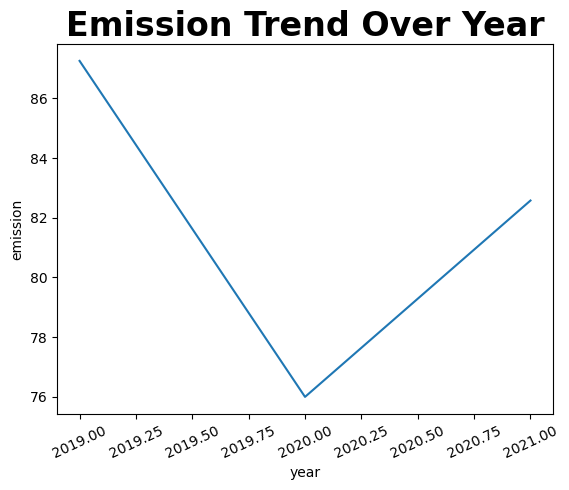

In [9]:
sns.lineplot(data = train, x = 'year', y = 'emission', errorbar = None)
    
plt.title('Emission Trend Over Year', fontsize = 24, fontweight = 'bold')
plt.xticks(rotation = 25)
plt.show()

**During the year 2020 we can see the dip the reason is to be Covid-19 and maybe it was in the starting weeks since we can the growth after a certain range**

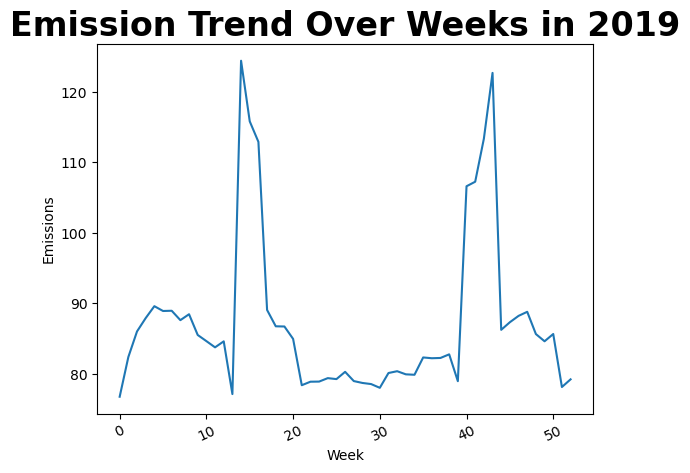

In [10]:
filtered_data_2019 = train[train['year'] == 2019]  # Filter data for the year 2020

sns.lineplot(data=filtered_data_2019, x='week_no', y='emission', err_style=None)

plt.title('Emission Trend Over Weeks in 2019', fontsize=24, fontweight='bold')
plt.xticks(rotation=25)
plt.xlabel('Week')
plt.ylabel('Emissions')
plt.show()

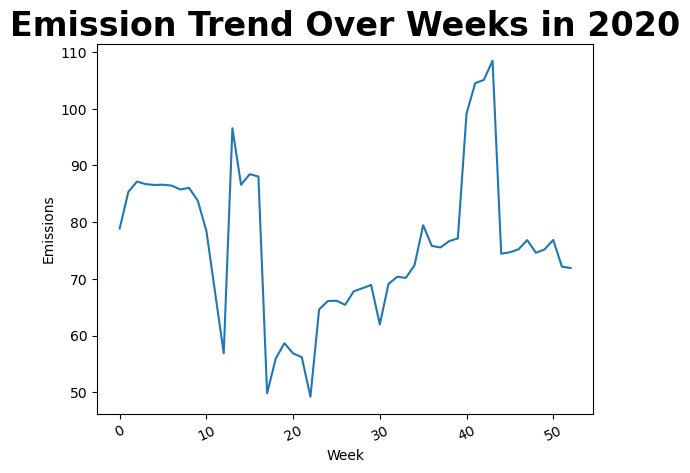

In [11]:
filtered_data_2020 = train[train['year'] == 2020]  # Filter data for the year 2020

sns.lineplot(data=filtered_data_2020, x='week_no', y='emission', err_style=None)

plt.title('Emission Trend Over Weeks in 2020', fontsize=24, fontweight='bold')
plt.xticks(rotation=25)
plt.xlabel('Week')
plt.ylabel('Emissions')
plt.show()

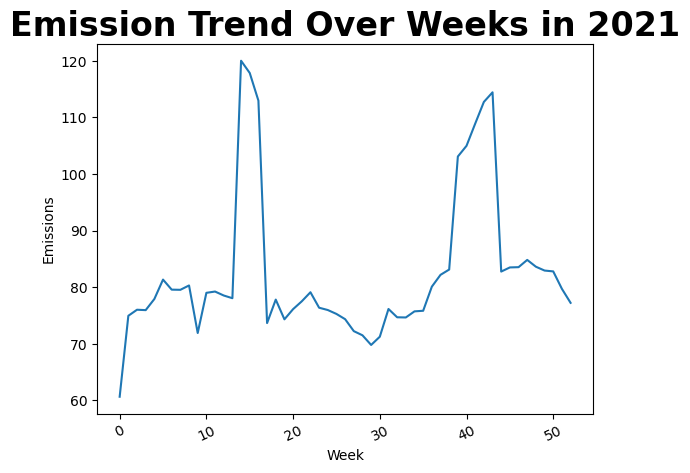

In [12]:
filtered_data_2021 = train[train['year'] == 2021]  # Filter data for the year 2020

sns.lineplot(data=filtered_data_2021, x='week_no', y='emission', err_style=None)

plt.title('Emission Trend Over Weeks in 2021', fontsize=24, fontweight='bold')
plt.xticks(rotation=25)
plt.xlabel('Week')
plt.ylabel('Emissions')
plt.show()

**1. As we expected that the dip seen was from almost 7-8th week of the 2020 where emssion were certainlly low due to Covid-19 reasons.**                         

**2.We can see peek emssion in all 3 years and I noticed that the in every year between 10th-20th and 40th-50th week the carbon emssions are high  reaching almost 100 and above**

In [13]:
fig = px.scatter_mapbox(data_frame=filtered_data_2019,
                     lat='latitude', lon='longitude',
                     size='emission', color='emission',
                     title='Carbon Emission Locations in 2020',
                     opacity=0.7, size_max=30)
fig.update_layout(mapbox_style="open-street-map")

# Show the plot
fig.show()

In [14]:
fig = px.scatter_mapbox(data_frame=filtered_data_2020,
                     lat='latitude', lon='longitude',
                     size='emission', color='emission',
                     title='Carbon Emission Locations in 2020',
                     opacity=0.7, size_max=30)
fig.update_layout(mapbox_style="open-street-map")
# Show the plot
fig.show()

In [15]:
fig = px.scatter_mapbox(data_frame=filtered_data_2021,
                     lat='latitude', lon='longitude',
                     size='emission', color='emission',
                     title='Carbon Emission Locations in 2020',
                     opacity=0.7, size_max=30)
fig.update_layout(mapbox_style="open-street-map")
# Show the plot
fig.show()

In [16]:
pd.set_option("display.max_rows", None)  
train.isnull().sum()

latitude                                                        0
longitude                                                       0
year                                                            0
week_no                                                         0
SulphurDioxide_SO2_column_number_density                    14609
SulphurDioxide_SO2_column_number_density_amf                14609
SulphurDioxide_SO2_slant_column_number_density              14609
SulphurDioxide_cloud_fraction                               14609
SulphurDioxide_sensor_azimuth_angle                         14609
SulphurDioxide_sensor_zenith_angle                          14609
SulphurDioxide_solar_azimuth_angle                          14609
SulphurDioxide_solar_zenith_angle                           14609
SulphurDioxide_SO2_column_number_density_15km               14609
CarbonMonoxide_CO_column_number_density                      2122
CarbonMonoxide_H2O_column_number_density                     2122
CarbonMono

* **certainly we see that week_no,longitude,lattitude,year,emission are the columns which dosent have missing values**

In [17]:
test.isnull().sum()

latitude                                                        0
longitude                                                       0
year                                                            0
week_no                                                         0
SulphurDioxide_SO2_column_number_density                     6142
SulphurDioxide_SO2_column_number_density_amf                 6142
SulphurDioxide_SO2_slant_column_number_density               6142
SulphurDioxide_cloud_fraction                                6142
SulphurDioxide_sensor_azimuth_angle                          6142
SulphurDioxide_sensor_zenith_angle                           6142
SulphurDioxide_solar_azimuth_angle                           6142
SulphurDioxide_solar_zenith_angle                            6142
SulphurDioxide_SO2_column_number_density_15km                6142
CarbonMonoxide_CO_column_number_density                      1337
CarbonMonoxide_H2O_column_number_density                     1337
CarbonMono

In [18]:
threshold = 78500
train_filtered = train.dropna(thresh=len(train) - threshold, axis=1)

In [19]:
train_filtered.isnull().sum()

latitude                                                        0
longitude                                                       0
year                                                            0
week_no                                                         0
SulphurDioxide_SO2_column_number_density                    14609
SulphurDioxide_SO2_column_number_density_amf                14609
SulphurDioxide_SO2_slant_column_number_density              14609
SulphurDioxide_cloud_fraction                               14609
SulphurDioxide_sensor_azimuth_angle                         14609
SulphurDioxide_sensor_zenith_angle                          14609
SulphurDioxide_solar_azimuth_angle                          14609
SulphurDioxide_solar_zenith_angle                           14609
SulphurDioxide_SO2_column_number_density_15km               14609
CarbonMonoxide_CO_column_number_density                      2122
CarbonMonoxide_H2O_column_number_density                     2122
CarbonMono

In [20]:
train_filtered.shape

(79023, 68)

In [21]:
threshold = 22200
test_filtered = test.dropna(thresh=len(test) - threshold, axis=1)

In [22]:
test_filtered.shape

(24353, 67)

In [23]:
test_filtered.isnull().sum()

latitude                                                       0
longitude                                                      0
year                                                           0
week_no                                                        0
SulphurDioxide_SO2_column_number_density                    6142
SulphurDioxide_SO2_column_number_density_amf                6142
SulphurDioxide_SO2_slant_column_number_density              6142
SulphurDioxide_cloud_fraction                               6142
SulphurDioxide_sensor_azimuth_angle                         6142
SulphurDioxide_sensor_zenith_angle                          6142
SulphurDioxide_solar_azimuth_angle                          6142
SulphurDioxide_solar_zenith_angle                           6142
SulphurDioxide_SO2_column_number_density_15km               6142
CarbonMonoxide_CO_column_number_density                     1337
CarbonMonoxide_H2O_column_number_density                    1337
CarbonMonoxide_cloud_heig

In [24]:
train_filtered.head()

,latitude,longitude,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,SulphurDioxide_sensor_zenith_angle,...,Cloud_cloud_top_height,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle,emission
ID_LAT_LON_YEAR_WEEK,,,,,,,,,,,,,,,,,,,,,
ID_-0.510_29.290_2019_00,-0.51,29.29,2019,0,-0.000108,0.603019,-0.000065,0.255668,-98.593887,50.843559,...,3664.436218,61085.809570,2615.120483,15.568533,0.272292,-12.628986,35.632416,-138.786423,30.752140,3.750994
ID_-0.510_29.290_2019_01,-0.51,29.29,2019,1,0.000021,0.728214,0.000014,0.130988,16.592861,39.137194,...,3651.190311,66969.478735,3174.572424,8.690601,0.256830,30.359375,39.557633,-145.183930,27.251779,4.025176
ID_-0.510_29.290_2019_02,-0.51,29.29,2019,2,0.000514,0.748199,0.000385,0.110018,72.795837,52.868816,...,4216.986492,60068.894448,3516.282669,21.103410,0.251101,15.377883,30.401823,-142.519545,26.193296,4.231381
ID_-0.510_29.290_2019_03,-0.51,29.29,2019,3,NaN,NaN,NaN,NaN,NaN,NaN,...,5228.507736,51064.547339,4180.973322,15.386899,0.262043,-11.293399,24.380357,-132.665828,28.829155,4.305286
ID_-0.510_29.290_2019_04,-0.51,29.29,2019,4,-0.000079,0.676296,-0.000048,0.121164,4.121269,35.515587,...,3980.598120,63751.125781,3355.710107,8.114694,0.235847,38.532263,37.392979,-141.509805,22.204612,4.347317


In [25]:
train_filtered = train_filtered.fillna(train_filtered.mean())
test_filtered = test_filtered.fillna(test_filtered.mean())

In [26]:
train_filtered.head()

,latitude,longitude,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,SulphurDioxide_sensor_zenith_angle,...,Cloud_cloud_top_height,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle,emission
ID_LAT_LON_YEAR_WEEK,,,,,,,,,,,,,,,,,,,,,
ID_-0.510_29.290_2019_00,-0.51,29.29,2019,0,-0.000108,0.603019,-0.000065,0.255668,-98.593887,50.843559,...,3664.436218,61085.809570,2615.120483,15.568533,0.272292,-12.628986,35.632416,-138.786423,30.752140,3.750994
ID_-0.510_29.290_2019_01,-0.51,29.29,2019,1,0.000021,0.728214,0.000014,0.130988,16.592861,39.137194,...,3651.190311,66969.478735,3174.572424,8.690601,0.256830,30.359375,39.557633,-145.183930,27.251779,4.025176
ID_-0.510_29.290_2019_02,-0.51,29.29,2019,2,0.000514,0.748199,0.000385,0.110018,72.795837,52.868816,...,4216.986492,60068.894448,3516.282669,21.103410,0.251101,15.377883,30.401823,-142.519545,26.193296,4.231381
ID_-0.510_29.290_2019_03,-0.51,29.29,2019,3,0.000048,0.834848,0.000035,0.158418,-7.925870,37.436189,...,5228.507736,51064.547339,4180.973322,15.386899,0.262043,-11.293399,24.380357,-132.665828,28.829155,4.305286
ID_-0.510_29.290_2019_04,-0.51,29.29,2019,4,-0.000079,0.676296,-0.000048,0.121164,4.121269,35.515587,...,3980.598120,63751.125781,3355.710107,8.114694,0.235847,38.532263,37.392979,-141.509805,22.204612,4.347317


In [27]:
train_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 79023 entries, ID_-0.510_29.290_2019_00 to ID_-3.299_30.301_2021_52
Data columns (total 68 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   latitude                                                  79023 non-null  float64
 1   longitude                                                 79023 non-null  float64
 2   year                                                      79023 non-null  int64  
 3   week_no                                                   79023 non-null  int64  
 4   SulphurDioxide_SO2_column_number_density                  79023 non-null  float64
 5   SulphurDioxide_SO2_column_number_density_amf              79023 non-null  float64
 6   SulphurDioxide_SO2_slant_column_number_density            79023 non-null  float64
 7   SulphurDioxide_cloud_fraction                             79023 no

# **SATELLITE DATA ANALYSIS**

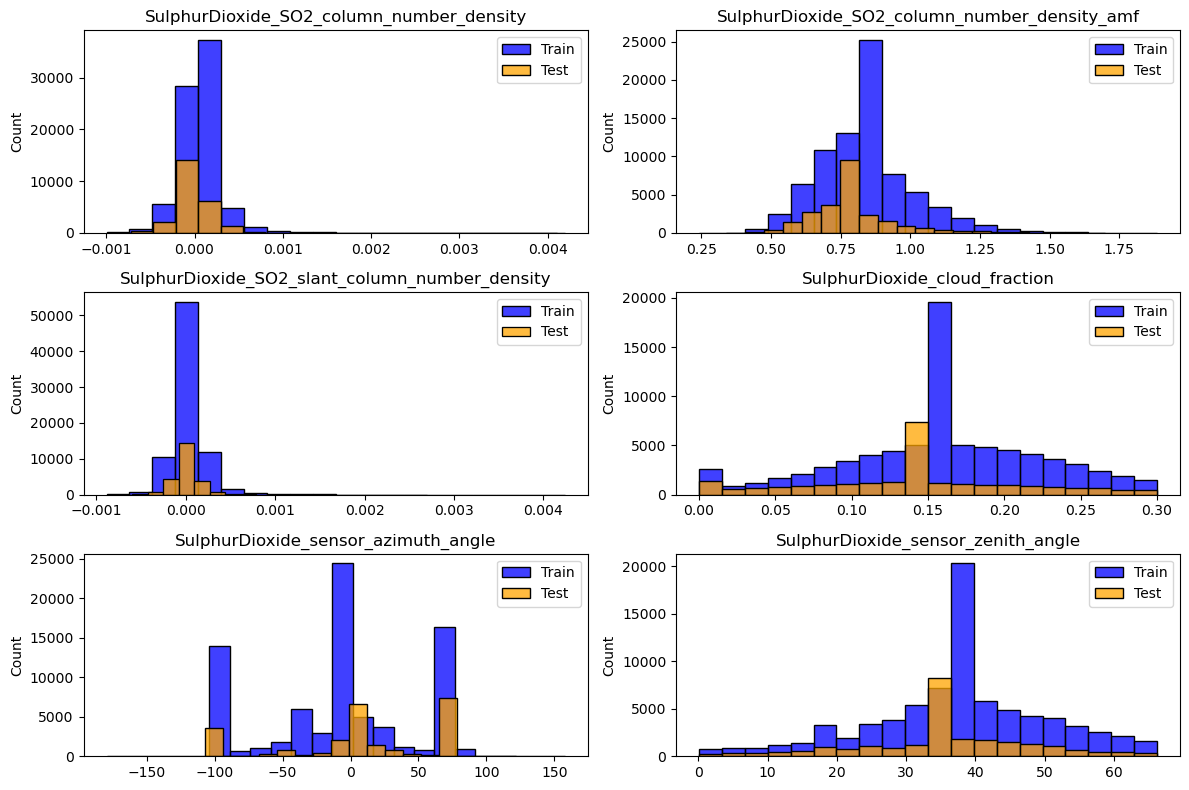

In [28]:
def plot_histogram_subplots(train_df, test_df, columns_to_plot, n_cols=2, bins=20):
    n_rows = (len(columns_to_plot) + n_cols - 1) // n_cols

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 8))

    for i, column in enumerate(columns_to_plot):
        row = i // n_cols
        col = i % n_cols

        sns.histplot(data=train_df, x=column, ax=axes[row, col], bins=bins, color='blue', label='Train')
        sns.histplot(data=test_df, x=column, ax=axes[row, col], bins=bins, color='orange', label='Test')

        axes[row, col].set_title(column)
        axes[row, col].set_xlabel(None)
        axes[row, col].legend()

    plt.tight_layout()
    plt.show()

columns_to_plot = [
    'SulphurDioxide_SO2_column_number_density',
    'SulphurDioxide_SO2_column_number_density_amf',
    'SulphurDioxide_SO2_slant_column_number_density',
    'SulphurDioxide_cloud_fraction',
    'SulphurDioxide_sensor_azimuth_angle',
    'SulphurDioxide_sensor_zenith_angle'
]

plot_histogram_subplots(train_filtered, test_filtered, columns_to_plot)

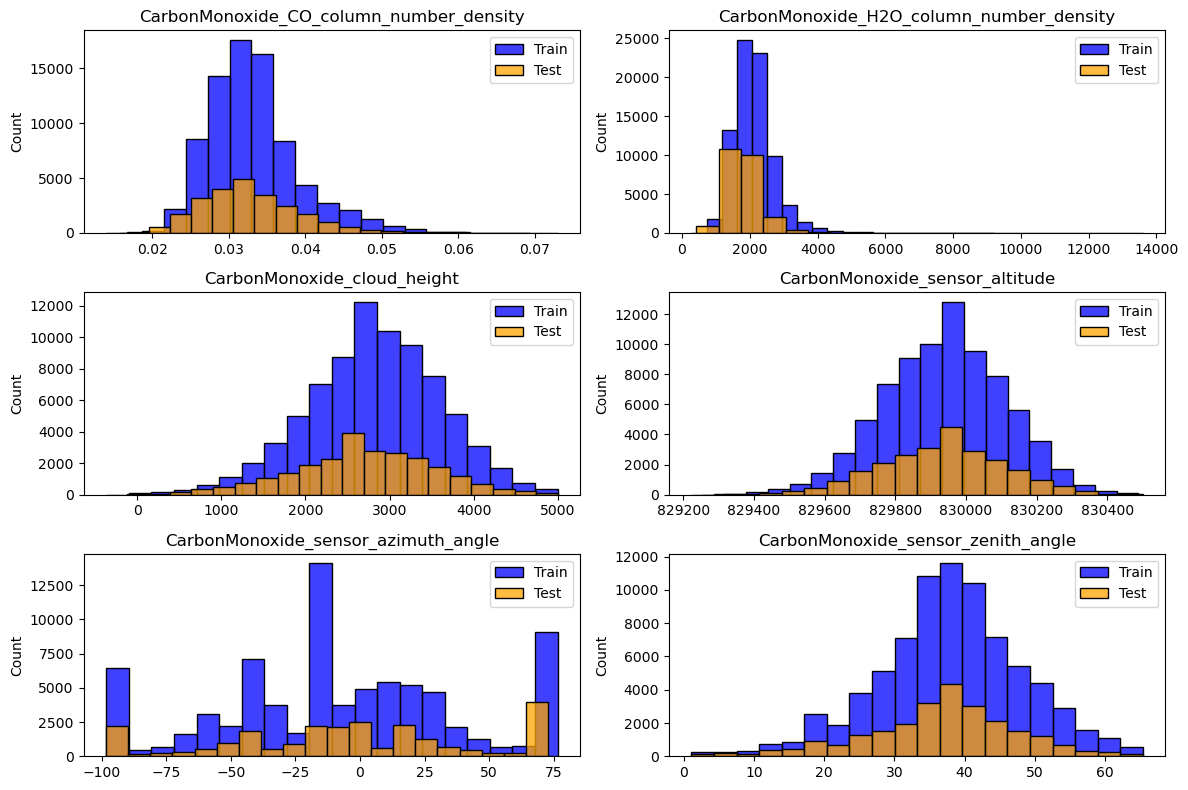

In [29]:
columns_to_plot1 = [
    'CarbonMonoxide_CO_column_number_density',
    'CarbonMonoxide_H2O_column_number_density',
    'CarbonMonoxide_cloud_height',
    'CarbonMonoxide_sensor_altitude',
    'CarbonMonoxide_sensor_azimuth_angle',
    'CarbonMonoxide_sensor_zenith_angle'
]

plot_histogram_subplots(train_filtered, test_filtered, columns_to_plot1)

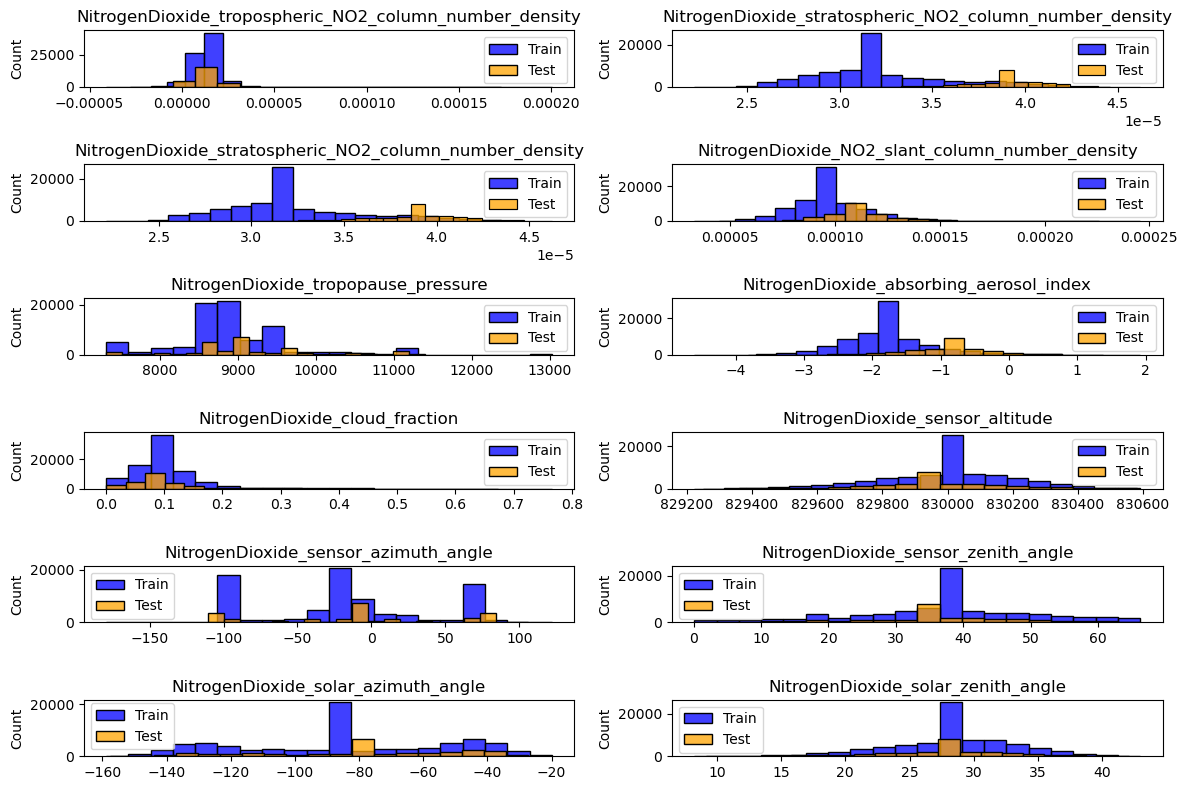

In [30]:
columns_to_plot2 = [
    'NitrogenDioxide_tropospheric_NO2_column_number_density',
    'NitrogenDioxide_stratospheric_NO2_column_number_density',
    'NitrogenDioxide_stratospheric_NO2_column_number_density',
    'NitrogenDioxide_NO2_slant_column_number_density',
    'NitrogenDioxide_tropopause_pressure',
    'NitrogenDioxide_absorbing_aerosol_index',
    'NitrogenDioxide_cloud_fraction',
    'NitrogenDioxide_sensor_altitude',
    'NitrogenDioxide_sensor_azimuth_angle',
    'NitrogenDioxide_sensor_zenith_angle',
    'NitrogenDioxide_solar_azimuth_angle',
    'NitrogenDioxide_solar_zenith_angle'    
]

plot_histogram_subplots(train_filtered, test_filtered, columns_to_plot2)


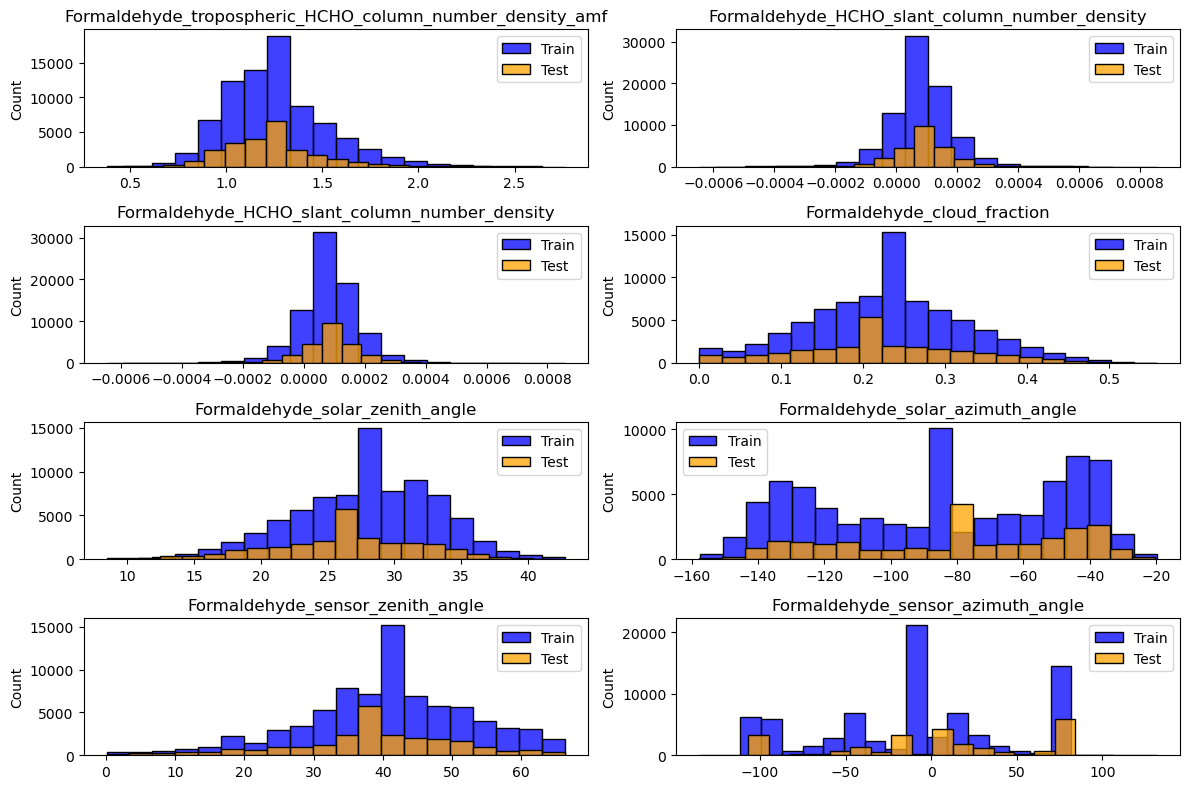

In [31]:
columns_to_plot3 = [
    'Formaldehyde_tropospheric_HCHO_column_number_density_amf',
    'Formaldehyde_HCHO_slant_column_number_density',
    'Formaldehyde_HCHO_slant_column_number_density',
    'Formaldehyde_cloud_fraction',
    'Formaldehyde_solar_zenith_angle',
    'Formaldehyde_solar_azimuth_angle',
    'Formaldehyde_sensor_zenith_angle',
    'Formaldehyde_sensor_azimuth_angle'  
]

plot_histogram_subplots(train_filtered, test_filtered, columns_to_plot3)

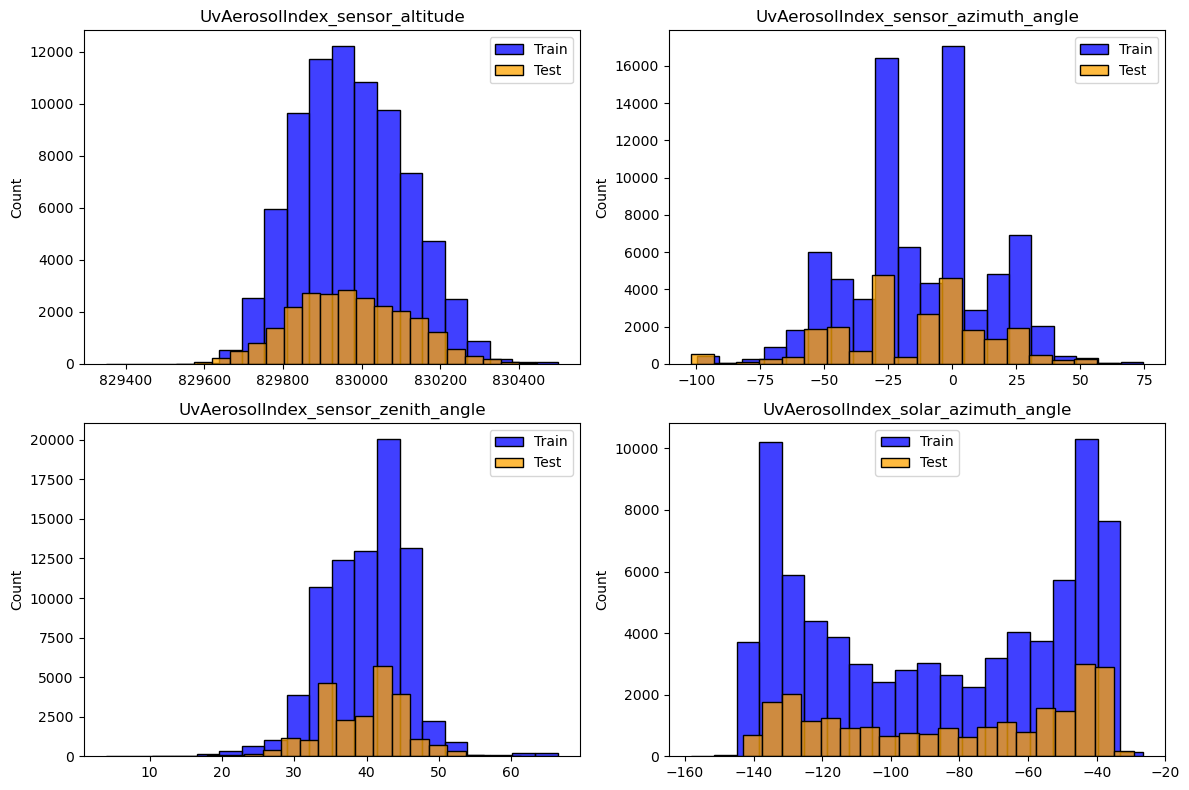

In [32]:
columns_to_plot4 = [
    'UvAerosolIndex_sensor_altitude',
    'UvAerosolIndex_sensor_azimuth_angle',
    'UvAerosolIndex_sensor_zenith_angle',
    'UvAerosolIndex_solar_azimuth_angle',  
]

plot_histogram_subplots(train_filtered, test_filtered, columns_to_plot4)

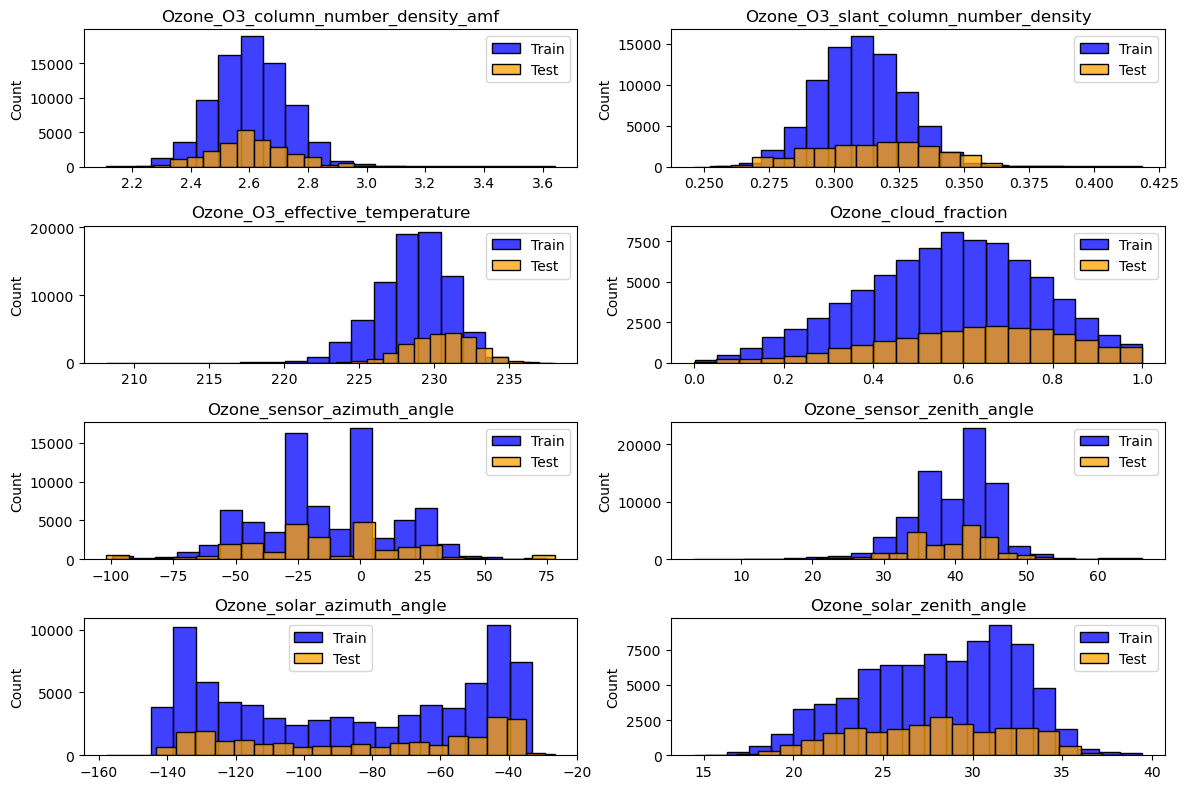

In [33]:
columns_to_plot5 = [
    'Ozone_O3_column_number_density_amf',
    'Ozone_O3_slant_column_number_density',
    'Ozone_O3_effective_temperature',
    'Ozone_cloud_fraction',
    'Ozone_sensor_azimuth_angle',
    'Ozone_sensor_zenith_angle',
    'Ozone_solar_azimuth_angle',
    'Ozone_solar_zenith_angle'
]

plot_histogram_subplots(train_filtered, test_filtered, columns_to_plot5)

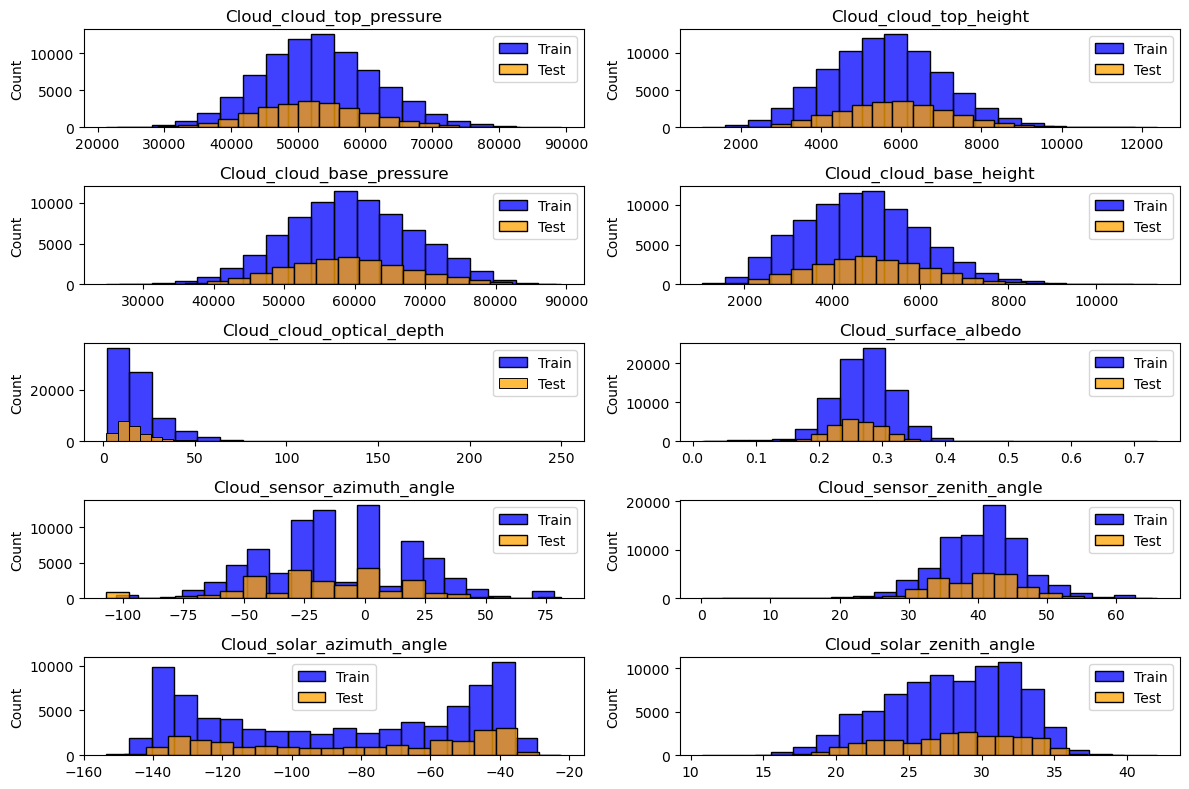

In [34]:
columns_to_plot6 = [
    'Cloud_cloud_top_pressure',
    'Cloud_cloud_top_height',
    'Cloud_cloud_base_pressure',
    'Cloud_cloud_base_height',
    'Cloud_cloud_optical_depth',
    'Cloud_surface_albedo',
    'Cloud_sensor_azimuth_angle',
    'Cloud_sensor_zenith_angle',
    'Cloud_solar_azimuth_angle',
    'Cloud_solar_zenith_angle'    
]

plot_histogram_subplots(train_filtered, test_filtered, columns_to_plot6)


**OBSERVATIONS**

* SulphurDioxide-Variables - In all cases, both training and test distributions follow each other. We can assume that the values in the training and test dataset derive from the same distributions.
* CarbonMonoxide-Variables - Similarly as earlier, we have quite good overlaying here. In all cases, both training and test features from that group derive probably from the same distributions.
* In the case of the Nitrogen Dioxide variables, an interesting observation emerges. Upon comparing the distributions of test and train features, it becomes apparent that certain features exhibit distinct distributions. Despite both datasets generally conforming to a normal distribution, these features show a noticeable shift in their distribution characteristics. Specifically, the Solar Zenith Angle feature displays a prominent peak that deviates from the train data distribution, indicating a potential shift in its behavior. Similarly, another feature, the Solar Azimuth Angle, follows a similar pattern with a pronounced peak that differs from the train data distribution. These variations suggest that the Nitrogen Dioxide group of variables exhibits unique distributional differences between the test and train datasets.
* Formaldehyde-Variables - There is nothing different to be seen. Almost perfect overlaying and distributions.
* Ozone-Variables - The completely different character of the Ozone_O3_Column_Number_Density feature. It's the total atmospheric column of O3 between the surface and the top of the atmosphere. Moreover, the Ozone_O3_Effective_Temperature recorded a slight increase. This feature is an ozone cross section effective temperature.
* Cloud-Variables - Almost perfect overlaying in all sub-features.

# MODEL 1 : SGDRegressor

We will build a simple model forecasting emissions in 2022. For this case, we will use Different Regressor and only three features from the training dataset, i.e. Latitude, Longitude, and Week_No. Since there were no missing values, we don't need to bother about appropriate imputation, and what is more, this is probably the most basic and straightforward approach. Subsequently, we can develop this approach, for example, by adding measurements from the satellite in the next version.

In [35]:
X = train_filtered[["latitude", "longitude", "week_no"]]
y = train_filtered.emission

In [36]:
print("X shape",X.shape)
print("y shape",y.shape)

X shape (79023, 3)
y shape (79023,)


In [37]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=242)

model = SGDRegressor(penalty=None, alpha=0.01, max_iter=10000, random_state=42)
model.fit(X_train, y_train)

y_test_pred = model.predict(X_test)


In [38]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [39]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X, y, cv=3, scoring='neg_mean_squared_error')

# The cross_val_score function returns negative MSE, so we need to take the negative of the scores
rmse_scores = np.sqrt(-scores)

# Print the RMSE scores for each fold
for i, rmse in enumerate(rmse_scores, start=1):
    print(f"Fold {i} RMSE: {rmse:.2f}")

# Calculate and print the average RMSE across all folds
average_rmse = np.mean(rmse_scores)
print(f"Average RMSE: {average_rmse:.2f}")

Fold 1 RMSE: 91.74
Fold 2 RMSE: 153.66
Fold 3 RMSE: 197.59
Average RMSE: 147.66


# **MODEL 2 : GradientBoostingRegressor**

In [40]:
from sklearn.ensemble import GradientBoostingRegressor

model2 = GradientBoostingRegressor(n_estimators=100, random_state=242)

# Fit the model to the training data
model2.fit(X_train, y_train)

# Generate the predicted values for the test set
y_test_pred1 = model2.predict(X_test)

scores = cross_val_score(model2, X, y, cv=3, scoring='neg_mean_squared_error')

# The cross_val_score function returns negative MSE, so we need to take the negative of the scores
rmse_scores = np.sqrt(-scores)

# Print the RMSE scores for each fold
for i, rmse in enumerate(rmse_scores, start=1):
    print(f"Fold {i} RMSE: {rmse:.2f}")

# Calculate and print the average RMSE across all folds
average_rmse = np.mean(rmse_scores)
print(f"Average RMSE: {average_rmse:.2f}")

Fold 1 RMSE: 106.47
Fold 2 RMSE: 133.49
Fold 3 RMSE: 188.46
Average RMSE: 142.81


# **MODEL 3 : RandomForestRegressor**

In [41]:
from sklearn.ensemble import RandomForestRegressor

model3 = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model to the training data
model3.fit(X_train, y_train)

# Generate the predicted values for the test set
y_test_pred3 = model3.predict(X_test)

scores = cross_val_score(model3, X, y, cv=3, scoring='neg_mean_squared_error')

# The cross_val_score function returns negative MSE, so we need to take the negative of the scores
rmse_scores = np.sqrt(-scores)

# Print the RMSE scores for each fold
for i, rmse in enumerate(rmse_scores, start=1):
    print(f"Fold {i} RMSE: {rmse:.2f}")

# Calculate and print the average RMSE across all folds
average_rmse = np.mean(rmse_scores)
print(f"Average RMSE: {average_rmse:.2f}")

Fold 1 RMSE: 127.03
Fold 2 RMSE: 138.94
Fold 3 RMSE: 188.63
Average RMSE: 151.53


# **MODEL 4: XGB**

In [42]:
import xgboost as xgb

model4 = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
model4.fit(X_train, y_train)

y_test_pred4 = model4.predict(X_test)

scores = cross_val_score(model4, X, y, cv=3, scoring='neg_mean_squared_error')

# The cross_val_score function returns negative MSE, so we need to take the negative of the scores
rmse_scores = np.sqrt(-scores)

# Print the RMSE scores for each fold
for i, rmse in enumerate(rmse_scores, start=1):
    print(f"Fold {i} RMSE: {rmse:.2f}")

# Calculate and print the average RMSE across all folds
average_rmse = np.mean(rmse_scores)
print(f"Average RMSE: {average_rmse:.2f}")

Fold 1 RMSE: 125.49
Fold 2 RMSE: 140.45
Fold 3 RMSE: 189.63
Average RMSE: 151.86


In [43]:
from lightgbm import LGBMRegressor

# Create and train the LGBM Regressor model
model5 = LGBMRegressor(
    n_estimators=100,
    learning_rate=0.4,
    min_child_samples=4,
    num_leaves=512, 
    objective="poisson",
)

model5.fit(X_train, y_train)

# Make predictions on the test set
y_pred5 = model5.predict(X_test)

scores = cross_val_score(model5, X, y, cv=3, scoring='neg_mean_squared_error')

# The cross_val_score function returns negative MSE, so we need to take the negative of the scores
rmse_scores = np.sqrt(-scores)

# Print the RMSE scores for each fold
for i, rmse in enumerate(rmse_scores, start=1):
    print(f"Fold {i} RMSE: {rmse:.2f}")

# Calculate and print the average RMSE across all folds
average_rmse = np.mean(rmse_scores)
print(f"Average RMSE: {average_rmse:.2f}")

Fold 1 RMSE: 205.50
Fold 2 RMSE: 139.47
Fold 3 RMSE: 240.60
Average RMSE: 195.19


In [44]:
#submission = pd.DataFrame(
  #  {
  #      "ID_LAT_LON_YEAR_WEEK": test.index,
   #     "emission": model4.predict(test[["latitude", "longitude", "week_no"]]),
   # }
#).set_index("ID_LAT_LON_YEAR_WEEK")

#submission.to_csv("submission1.csv")
#submission.head()
#submission['emission'] = submission['emission'] * 1.07

In [45]:
#submission1.head(30)

# NO ML METHOD

*Also get the max emissions from years 2019, 2020, & 2021. This is based on approach by [danbraswell](https://www.kaggle.com/code/danbraswell/no-ml-public-lb-23-02231) . If the predictions are lesser than the maximum emissions occured in the previous three years, this could be replaced with the maximum emission*

In [46]:
# Create new column with combined lat/lon
train.insert(2,"lat_lon", list(zip(train["latitude"],train["longitude"])))

# Calculate the standard deviation of emissions for each year and lat_lon combination
train['location_std'] = train.groupby(['year','lat_lon'])['emission'].transform('std')

# Calculate the mean of emissions for each year and lat_lon combination
train['location_mean'] = train.groupby(['year','lat_lon'])['emission'].transform('mean')

# Normalize the emission values using the mean and std computed above
train['emission_norm'] = (train['emission']-train['location_mean'])/train['location_std']

# Create a new column for adjusted emission values, initially set it as the original emission values
train['emission_new'] = train['emission']

# Adjust the 2019 and 2020 'location_std' to be the same as 2021's for consistency
train.loc[train['year']==2019,'location_std'] = train.loc[train['year']==2021,'location_std'].values
train.loc[train['year']==2020,'location_std'] = train.loc[train['year']==2021,'location_std'].values

# Adjust the 2019 and 2020 'location_mean' to be the same as 2021's for consistency
train.loc[train['year']==2019,'location_mean'] = train.loc[train['year']==2021,'location_mean'].values
train.loc[train['year']==2020,'location_mean'] = train.loc[train['year']==2021,'location_mean'].values

# Denormalize the emission_norm values to get the new adjusted emission values
train['emission_new'] = train['emission_norm']*train['location_std']+train['location_mean']

# Replace any NaN values in the 'emission_new' column with 0
train['emission_new'] = train['emission_new'].fillna(0)

<Axes: xlabel='year,week_no'>

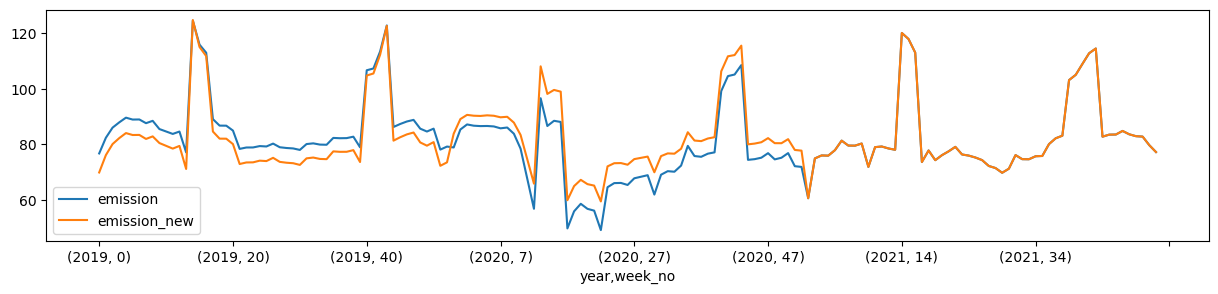

In [47]:
train.pivot_table(index=['year','week_no'],values=['emission','emission_new']).plot(figsize=(15,3))


In [48]:
train['emission'] = train['emission_new']

In [49]:
# Function to get emissions for specified year and location. Only use first 49 weeks.
def get_emissions_loc_year( loc, year ):
    df = train[(train["lat_lon"]==loc) & (train["year"]==year) & (train["week_no"]<49)].copy()
    return df["emission"].values

# Function to get the max emission (over 3 years) at location.
def get_emissions_max( loc ):
    emiss2019 = get_emissions_loc_year(loc,2019)
    emiss2020 = get_emissions_loc_year(loc,2020)
    emiss2021 = get_emissions_loc_year(loc,2021)
    return np.max([emiss2019,emiss2020,emiss2021],axis=0)

In [50]:
locations = train["lat_lon"].unique()

# Create 2022 predictions
predictions_acc = []
for loc in locations:
    emission = get_emissions_max( loc )
    predictions_acc.append( emission )

In [51]:
sample = pd.read_csv(r'/kaggle/input/playground-series-s3e20/sample_submission.csv')

predictions_2022 = np.hstack(predictions_acc)
# Create submission
submission = sample.copy()
submission["emission"] = predictions_2022
submission.to_csv("submission.csv",index=False)

In [52]:
submission.head(10)

,ID_LAT_LON_YEAR_WEEK,emission
0,ID_-0.510_29.290_2022_00,4.252746
1,ID_-0.510_29.290_2022_01,4.425709
2,ID_-0.510_29.290_2022_02,4.484926
3,ID_-0.510_29.290_2022_03,4.491671
4,ID_-0.510_29.290_2022_04,4.531024
5,ID_-0.510_29.290_2022_05,4.502558
6,ID_-0.510_29.290_2022_06,4.538482
7,ID_-0.510_29.290_2022_07,4.535236
8,ID_-0.510_29.290_2022_08,4.538888
9,ID_-0.510_29.290_2022_09,4.548479


In [53]:
#import os

#file_path = '/kaggle/working/submission1.csv'

#if os.path.exists(file_path):
#    os.remove(file_path)
#    print(f"File {file_path} removed successfully.")
#else:
#    print(f"File {file_path} does not exist.")